https://towardsdatascience.com/the-art-of-geofencing-in-python-e6cc237e172d

In [1]:
import pandas as pd
import geopandas as gpd
import plotly_express as px
import matplotlib.pyplot as plt

[GPS Trajectory link](https://www.dropbox.com/s/ejev7z29lzirbo5/GPSTrajectory.zip)

In [2]:
go_track_csv = "../data/raw/GPSTrajectory/go_track_trackspoints.csv"
df = pd.read_csv(go_track_csv)
df.head()

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


In [3]:
df.shape

(18107, 5)

In [4]:
df.groupby(["track_id"]).describe()

id                                                            \
          count     mean        std      min       25%      50%       75%   
track_id                                                                    
1          90.0     45.5  26.124701      1.0     23.25     45.5     67.75   
2         113.0    147.0  32.764310     91.0    119.00    147.0    175.00   
3          23.0    215.0   6.782330    204.0    209.50    215.0    220.50   
4         129.0    291.0  37.383151    227.0    259.00    291.0    323.00   
8          20.0    573.5   5.916080    564.0    568.75    573.5    578.25   
...         ...      ...        ...      ...       ...      ...       ...   
38081     122.0  19362.5  35.362409  19302.0  19332.25  19362.5  19392.75   
38082     134.0  19490.5  38.826537  19424.0  19457.25  19490.5  19523.75   
38084       4.0  19559.5   1.290994  19558.0  19558.75  19559.5  19560.25   
38090       2.0  19563.5   0.707107  19563.0  19563.25  19563.5  19563.75   
38092       5.0  19567.0   1.581139  19565.0  19566.00  19567.0  19568.00   

                  latitude             ...                       longitude  \
              max    count       mean  ...        75%        max     count   
track_id                               ...                                   
1            90.0     90.0 -10.942571  ... -10.941533 -10.938346      90.0   
2           203.0    113.0 -10.958290  ... -10.942861 -10.938293     113.0   
3           226.0     23.0 -10.907640  ... -10.906933 -10.903162      23.0   
4           355.0    129.0 -10.918409  ... -10.918298 -10.908893     129.0   
8           583.0     20.0 -10.944180  ... -10.943886 -10.943777      20.0   
...           ...      ...        ...  ...        ...        ...       ...   
38081     19423.0    122.0 -10.952959  ... -10.943418 -10.938952     122.0   
38082     19557.0    134.0 -10.957442  ... -10.945602 -10.941897     134.0   
38084     19561.0      4.0 -10.933429  ... -10.933398 -10.933398       4.0   
38090     19564.0      2.0 -10.869450  ... -10.869450 -10.869450       2.0   
38092     19569.0      5.0 -10.923714  ... -10.923715 -10.923704       5.0   

                                                                           \
               mean       std        min        25%        50%        75%   
track_id                                                                    
1        -37.052899  0.005330 -37.062879 -37.057346 -37.050989 -37.049488   
2        -37.065519  0.003293 -37.069515 -37.068245 -37.066873 -37.062570   
3        -37.048942  0.000798 -37.050502 -37.049711 -37.048379 -37.048248   
4        -37.071355  0.015573 -37.105205 -37.078712 -37.068452 -37.058893   
8        -37.052298  0.000608 -37.052796 -37.052744 -37.052514 -37.052155   
...             ...       ...        ...        ...        ...        ...   
38081    -37.061617  0.006910 -37.073660 -37.068724 -37.062844 -37.053986   
38082    -37.063747  0.011666 -37.089421 -37.074641 -37.058353 -37.054842   
38084    -37.078885  0.000025 -37.078923 -37.078885 -37.078873 -37.078873   
38090    -37.095276  0.000000 -37.095276 -37.095276 -37.095276 -37.095276   
38092    -37.106667  0.000049 -37.106693 -37.106688 -37.106688 -37.106688   

                     
                max  
track_id             
1        -37.045685  
2        -37.058909  
3        -37.048115  
4        -37.052372  
8        -37.051112  
...             ...  
38081    -37.053334  
38082    -37.053089  
38084    -37.078873  
38090    -37.095276  
38092    -37.106579  

[163 rows x 24 columns]

In [5]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head()

,id,latitude,longitude,track_id,time,geometry
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32,POINT (-37.06274 -10.93934)
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37,POINT (-37.06274 -10.93934)
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42,POINT (-37.06276 -10.93932)
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47,POINT (-37.06284 -10.93921)
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53,POINT (-37.06288 -10.93894)


In [6]:
gdf.describe(include='all')

/Users/mac/Desktop/2R/env/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,id,latitude,longitude,track_id,time,geometry
count,18107.000000,18107.000000,18107.000000,18107.000000,18107,18107
unique,NaN,NaN,NaN,NaN,13887,14431
top,NaN,NaN,NaN,NaN,2015-02-19 07:40:37,POINT (-37.0797083333333 -10.8970933333333)
freq,NaN,NaN,NaN,NaN,8,190
mean,9958.405920,-10.998744,-37.111923,13296.340697,NaN,NaN
std,5748.673657,1.329848,0.938015,18040.767448,NaN,NaN
min,1.000000,-27.603175,-48.632918,1.000000,NaN,NaN
25%,4736.500000,-10.944041,-37.073069,33.000000,NaN,NaN
50%,10376.000000,-10.922000,-37.057784,136.000000,NaN,NaN
75%,15004.500000,-10.904268,-37.050190,37992.000000,NaN,NaN


In [7]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(
    gdf, 
    lat="latitude", 
    lon="longitude" ,
    size_max=6, 
    zoom=8, width=1200, height=800)
fig.show(renderer="iframe")

In [8]:
centerarea_csv = "../data/raw/CENTERAREA/CENTERAREA.geojson"
polygon = gpd.read_file(centerarea_csv)
print(polygon)

                                            geometry
0  POLYGON ((-37.05243 -10.95446, -37.05163 -10.9...


In [9]:
polygon.set_option("max_colwidth", None)

AttributeError: 'GeoDataFrame' object has no attribute 'set_option'

In [10]:
polygon.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  1 non-null      geometry
dtypes: geometry(1)
memory usage: 136.0 bytes


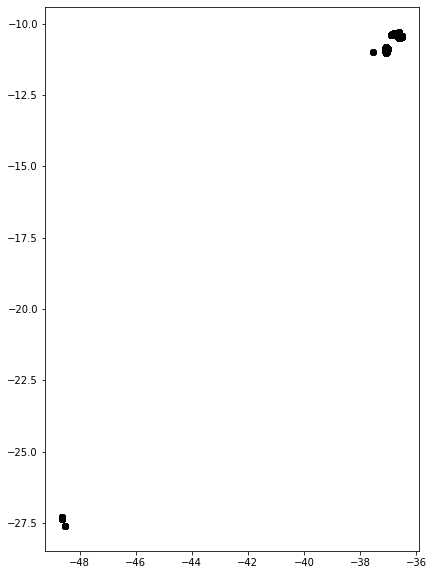

In [11]:
# Plot track_id 1 points over the Buffer Polygon
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, color="black")
polygon.plot(ax=ax)
#plt.tight_layout()
#plt.axis(‘off’)
plt.show()

In [12]:
mask = (polygon.loc[0, "geometry"])
pip_mask_geofence = gdf.within(mask)

In [13]:
#Create PIP mask
gdf.loc[:,"geofence"] = pip_mask_geofence
gdf.sample(10)

,id,latitude,longitude,track_id,time,geometry,geofence
7967,9290,-10.903767,-37.048122,132,2015-02-12 15:05:39,POINT (-37.04812 -10.90377),False
12279,13676,-10.927669,-37.080757,37955,2015-05-14 13:07:26,POINT (-37.08076 -10.92767),False
13328,14731,-10.918506,-37.051928,37969,2015-05-21 15:38:33,POINT (-37.05193 -10.91851),False
1084,1293,-10.918634,-37.065753,19,2014-10-15 10:03:51,POINT (-37.06575 -10.91863),False
2998,3207,-10.909715,-37.070289,28,2014-10-23 18:22:27,POINT (-37.07029 -10.90971),False
4452,4662,-10.385890,-36.890122,31,2014-11-04 19:37:03,POINT (-36.89012 -10.38589),False
15084,16509,-10.987290,-37.051524,38012,2015-06-03 04:11:00,POINT (-37.05152 -10.98729),False
7679,9002,-10.948610,-37.071886,131,2015-02-12 03:39:43,POINT (-37.07189 -10.94861),False
15800,17225,-10.937149,-37.054891,38017,2015-06-05 12:56:00,POINT (-37.05489 -10.93715),False
1086,1295,-10.918648,-37.066716,19,2014-10-15 10:04:14,POINT (-37.06672 -10.91865),False


In [14]:
gdf_2 = gdf[gdf["track_id"]==4]
gdf_3 = gdf_2["time"]
gdf_3.to_csv('time',index=False)

In [15]:
# Replace True with In and False with Out
gdf["geofence"] = gdf["geofence"].replace({True: "In", False: "Out"})

In [16]:
fig_2 = px.scatter_mapbox(gdf, lat="latitude", lon="longitude", color="geofence", size="track_id" ,
size_max=6, zoom=12, width=1200, height=800)
fig_2.show(renderer="iframe")

In [17]:
fig_3 = px.scatter_mapbox(
    gdf[gdf["track_id"]== 23], 
    lat="latitude", 
    lon="longitude", 
    color="geofence", 
    size="track_id", 
    animation_frame="time", 
    size_max=100, 
    zoom=12, 
    width=1200, 
    height=800
)
fig_3.show(renderer="iframe")